# Deteksi QR Code (Binary Classification)

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
from PIL import Image
from  tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

C:\Users\Aloysius\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Aloysius\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Aloysius\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Load Dataset

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [6]:
train_ds = datagen.flow_from_directory(directory='dataset',
                                             target_size=(IMG_SIZE, IMG_SIZE),
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary',
                                             subset='training')

val_ds = datagen.flow_from_directory(directory='dataset',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary',
                                         subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))

In [9]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))

In [10]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [11]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

In [12]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

In [13]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [14]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

In [15]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

In [16]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [18]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [19]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [20]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [21]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [22]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [23]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [24]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

In [25]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(units=4096, activation='relu'))

### Dropout dipakai untuk menghindari overfitting

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(units=4096, activation='relu'))

In [30]:
model.add(Dropout(0.5))

### Softmax diganti sigmoid karena lebih cocok untuk binary classification. Sedangkan softmax cocok untuk multi-class classification

In [31]:
model.add(Dense(units=1, activation='sigmoid'))

## Compile

In [32]:
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

# Training Model

In [34]:
metric = 'val_loss'

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor=metric, 
                             verbose=1, 
                             save_best_only=True, 
                             save_weight_only=False, 
                             mode='min')

early = EarlyStopping(monitor=metric, 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')


history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint, early])

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4900 
Epoch 1: val_loss improved from inf to 0.69312, saving model to vgg16_1.h5
50/50 [==============================] - 878s 18s/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.6200 
Epoch 2: val_loss did not improve from 0.69312
50/50 [==============================] - 877s 18s/step - loss: 0.6924 - accuracy: 0.6200 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.6625 
Epoch 3: val_loss did not improve from 0.69312
50/50 [==============================] - 884s 18s/step - loss: 0.6911 - accuracy: 0.6625 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.7688 
Epoch 4: val_loss improved from 0.69312 to 0.69311, saving

In [35]:
model.evaluate(val_ds)

13/13 [==============================] - 48s 4s/step - loss: 0.7043 - accuracy: 0.5000


[0.7042627930641174, 0.5]

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [37]:
print(history.history)

{'loss': [0.6932955980300903, 0.6924182772636414, 0.6911449432373047, 0.6891264915466309, 0.6857638359069824, 0.6809929013252258, 0.6728678941726685, 0.6578789353370667, 0.6230804920196533, 0.6036697030067444], 'accuracy': [0.49000000953674316, 0.6200000047683716, 0.6625000238418579, 0.768750011920929, 0.8112499713897705, 0.8050000071525574, 0.809374988079071, 0.7931249737739563, 0.7649999856948853, 0.6681249737739563], 'val_loss': [0.6931247711181641, 0.6932291984558105, 0.6932795643806458, 0.6931120157241821, 0.6927059292793274, 0.6924789547920227, 0.6913920640945435, 0.6886978149414062, 0.7035360932350159, 0.7042562961578369], 'val_accuracy': [0.5049999952316284, 0.5024999976158142, 0.5, 0.5049999952316284, 0.5099999904632568, 0.5049999952316284, 0.5099999904632568, 0.5099999904632568, 0.5024999976158142, 0.5]}


# Plot hasil training model

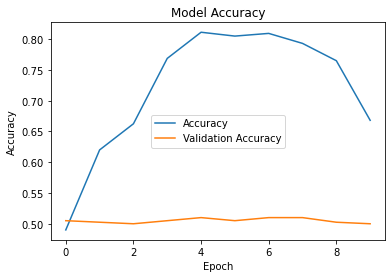

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

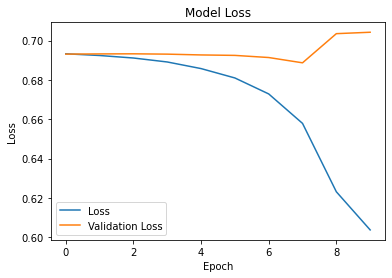

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

# Prediksi

In [40]:
model = tf.keras.models.load_model("vgg16_1.h5")

def prediksi(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)
    print(prediction)
    
    if prediction[0][0] > 0.5:
        print("QR code terdeteksi")
    else:
        print("QR code tidak terdeteksi")

[[0.57291466]]
QR code terdeteksi


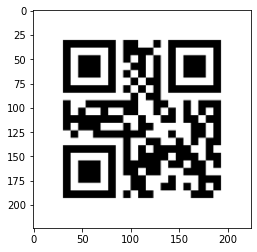

In [41]:
prediksi('test1.png')

[[0.5641532]]
QR code terdeteksi


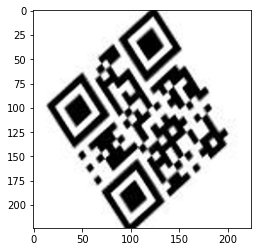

In [42]:
prediksi('test2.jpeg')

[[0.45991483]]
QR code tidak terdeteksi


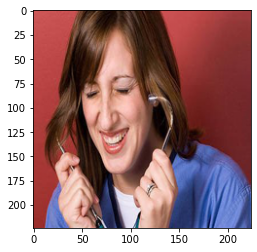

In [43]:
prediksi('test3.jpg')

[[0.45767087]]
QR code tidak terdeteksi


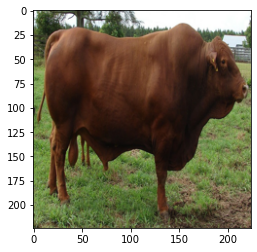

In [44]:
prediksi('sapi.jpg')

[[0.46370095]]
QR code tidak terdeteksi


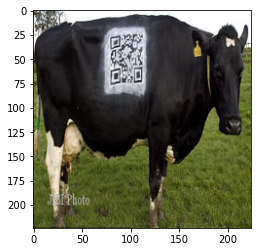

In [56]:
prediksi('sapi2.jpg')

[[0.46681955]]
QR code tidak terdeteksi


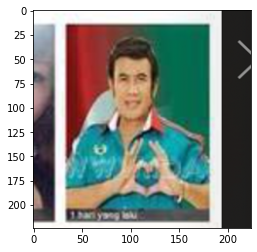

In [46]:
prediksi('roma love.png')

[[0.4580117]]
QR code tidak terdeteksi


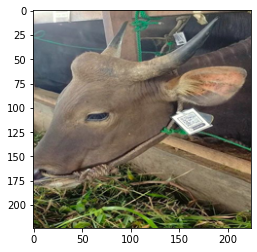

In [47]:
prediksi('sapi3.jpeg')

[[0.5733505]]
QR code terdeteksi


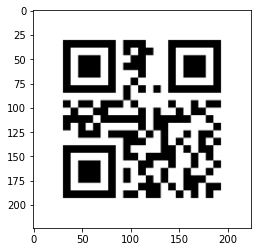

In [48]:
prediksi('test4.png')

[[0.57701594]]
QR code terdeteksi


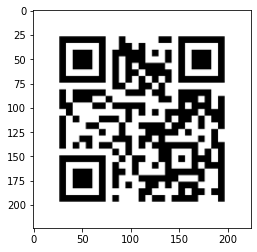

In [49]:
prediksi('test5.png')

[[0.5795814]]
QR code terdeteksi


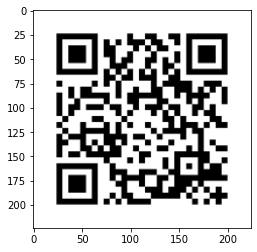

In [50]:
prediksi('test6.png')

[[0.4596423]]
QR code tidak terdeteksi


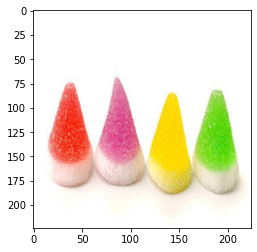

In [51]:
prediksi('random1.jpg')

[[0.45686582]]
QR code tidak terdeteksi


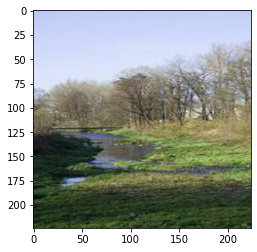

In [52]:
prediksi('random2.jpg')

[[0.4584813]]
QR code tidak terdeteksi


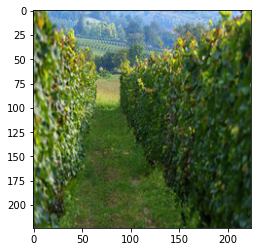

In [53]:
prediksi('random3.jpg')

[[0.4684384]]
QR code tidak terdeteksi


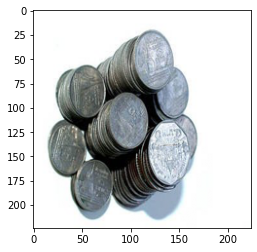

In [54]:
prediksi('random4.jpg')

[[0.45875996]]
QR code tidak terdeteksi


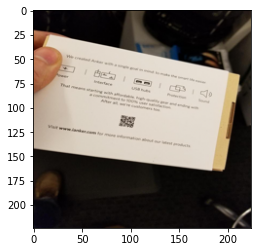

In [57]:
prediksi('fc9b5d9a2dab91477a3a183d2dc92912.jpg')